In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Exploratory Data Analysis

In [55]:
marketing_df = pd.read_csv('/home/marketing-analytics/datasets/olist_marketing_qualified_leads_dataset.csv')

In [56]:
marketing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   mql_id              8000 non-null   object
 1   first_contact_date  8000 non-null   object
 2   landing_page_id     8000 non-null   object
 3   origin              7940 non-null   object
dtypes: object(4)
memory usage: 250.1+ KB


In [57]:
marketing_df.head()

,mql_id,first_contact_date,landing_page_id,origin
0,dac32acd4db4c29c230538b72f8dd87d,2018-02-01,88740e65d5d6b056e0cda098e1ea6313,social
1,8c18d1de7f67e60dbd64e3c07d7e9d5d,2017-10-20,007f9098284a86ee80ddeb25d53e0af8,paid_search
2,b4bc852d233dfefc5131f593b538befa,2018-03-22,a7982125ff7aa3b2054c6e44f9d28522,organic_search
3,6be030b81c75970747525b843c1ef4f8,2018-01-22,d45d558f0daeecf3cccdffe3c59684aa,email
4,5420aad7fec3549a85876ba1c529bd84,2018-02-21,b48ec5f3b04e9068441002a19df93c6c,organic_search


In [58]:
marketing_df.describe(include='all')

,mql_id,first_contact_date,landing_page_id,origin
count,8000,8000,8000,7940
unique,8000,336,495,10
top,8723201570415eb23b4f095d8c20a27c,2018-05-02,b76ef37428e6799c421989521c0e5077,organic_search
freq,1,93,912,2296


In [59]:
# Renaming the 'landing_page_id' to keep only the first 5 characters
marketing_df['landing_page_id'] = marketing_df['landing_page_id'].str[:5]

In [60]:
marketing_df['landing_page_id'].describe()

count      8000
unique      495
top       b76ef
freq        912
Name: landing_page_id, dtype: object

The dataset contains 8,000 entries with four columns:
- mql_id: Unique identifier for each marketing qualified lead (MQL).
- first_contact_date: The date when the first contact was made.
- landing_page_id: Identifier for the landing page associated with the lead.
- origin: The origin or source of the lead (e.g., social, paid search, organic search).

Summary Statistics:
- The dataset contains 8,000 unique mql_ids, indicating that each entry is for a unique lead.
- The first_contact_date ranges from 2017-06-14 to 2018-05-31, with the most frequent date being 2018-05-02 (93 occurrences).
- There are 495 unique landing_page_ids, with one of them appearing 912 times.
- The most frequent lead origin is organic_search (2,296 occurrences), followed by paid_search (1,586 occurrences).

Missing Values:
- The origin column has 60 missing values, while the other columns have no missing values.

In [61]:
marketing_df['first_contact_date'] = pd.to_datetime(marketing_df['first_contact_date'], errors='coerce')

- 'mql_id': deals and mkt dataset
- 'first_contact_date' and 'won_date': we can calculate how many days to deal
- what the 'origin' of deals?
- what landing pages perfomed better?
- what landing pages bring the most valuable clients?
- what the origin of each profile type?

In [62]:
marketing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   mql_id              8000 non-null   object        
 1   first_contact_date  8000 non-null   datetime64[ns]
 2   landing_page_id     8000 non-null   object        
 3   origin              7940 non-null   object        
dtypes: datetime64[ns](1), object(3)
memory usage: 250.1+ KB


In [63]:
marketing_df['origin'].value_counts()

origin
organic_search       2296
paid_search          1586
social               1350
unknown              1099
direct_traffic        499
email                 493
referral              284
other                 150
display               118
other_publicities      65
Name: count, dtype: int64

- Organic search is the most effective lead origin, generating 2,296 leads.
- Paid search follows closely with 1,586 leads.
- Social generated 1,350 leads.
- Unknown sources contributed 1,099 leads.
- Other origins, like direct traffic, email, and referral, contribute fewer leads but may still be important in specific contexts.

/tmp/ipykernel_307115/2239964285.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(data=marketing_df['origin'], kind='point', palette='viridis')


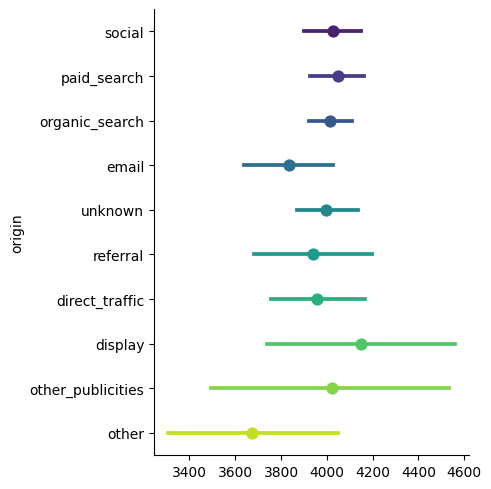

In [64]:
sns.catplot(data=marketing_df['origin'], kind='point', palette='viridis')
plt.show()

/tmp/ipykernel_307115/2421140732.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=marketing_df['origin'], palette='viridis')


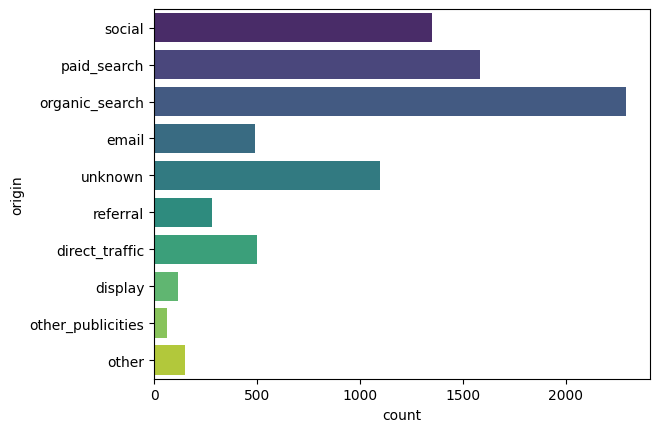

In [65]:
sns.countplot(data=marketing_df['origin'], palette='viridis')
plt.show()

In [66]:
marketing_df['origin'].describe()

count               7940
unique                10
top       organic_search
freq                2296
Name: origin, dtype: object

In [67]:
marketing_df['origin'].value_counts().describe()

count      10.000000
mean      794.000000
std       754.711718
min        65.000000
25%       183.500000
50%       496.000000
75%      1287.250000
max      2296.000000
Name: count, dtype: float64

In [68]:
marketing_df.columns

Index(['mql_id', 'first_contact_date', 'landing_page_id', 'origin'], dtype='object')

In [69]:
origin = marketing_df.groupby('origin')[['landing_page_id', 'first_contact_date']].value_counts().reset_index()
origin

,origin,landing_page_id,first_contact_date,count
0,direct_traffic,22c29,2018-03-26,4
1,direct_traffic,22c29,2018-02-21,3
2,direct_traffic,22c29,2018-05-10,3
3,direct_traffic,120ad,2018-03-06,2
4,direct_traffic,22c29,2017-07-27,2
...,...,...,...,...
5367,unknown,f98c2,2017-11-17,1
5368,unknown,fa6f5,2018-05-31,1
5369,unknown,fb582,2018-05-07,1
5370,unknown,fc83c,2018-03-06,1


<function matplotlib.pyplot.show(close=None, block=None)>

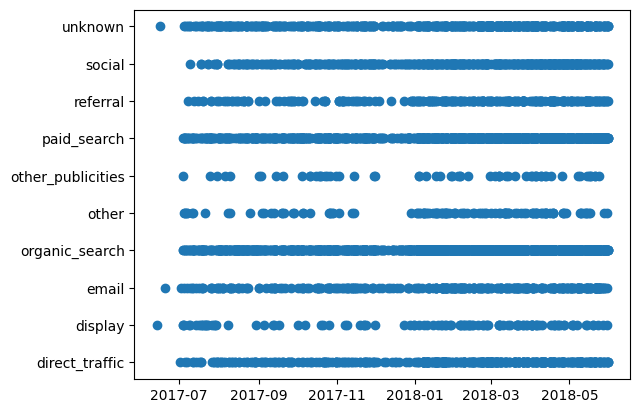

In [70]:
plt.scatter(data=origin, x='first_contact_date', y='origin')
plt.show

Em geral, as mídias contribuiram de forma constante para a ativação no primeiro contato.
Algumas lacunas sugerem que talvez as ações em alguns canais não foram constantes, por exemplo: other_publicities, other e display.

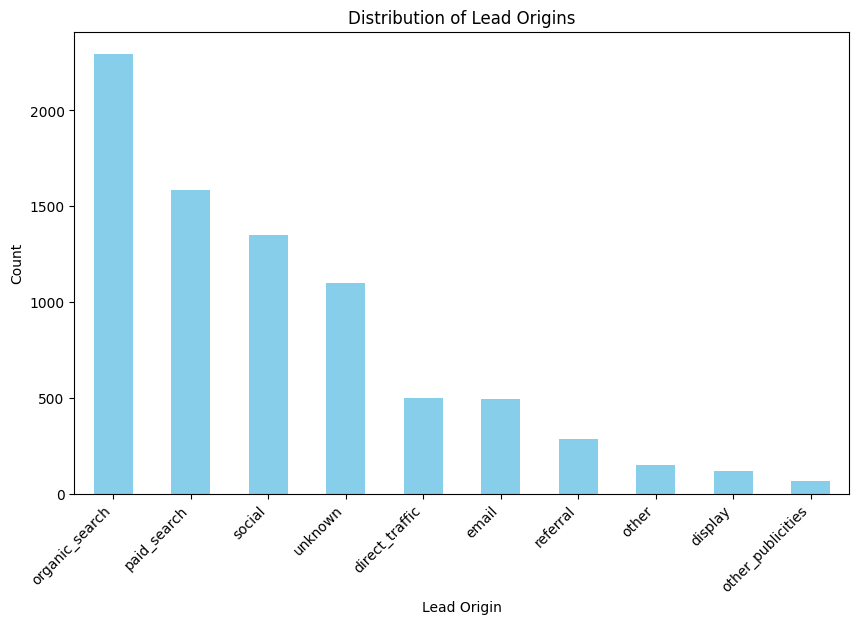

In [71]:
origin_distribution = marketing_df['origin'].value_counts()

# Plotting the distribution of lead origins
plt.figure(figsize=(10, 6))
origin_distribution.plot(kind='bar', color='skyblue')
plt.title('Distribution of Lead Origins')
plt.xlabel('Lead Origin')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

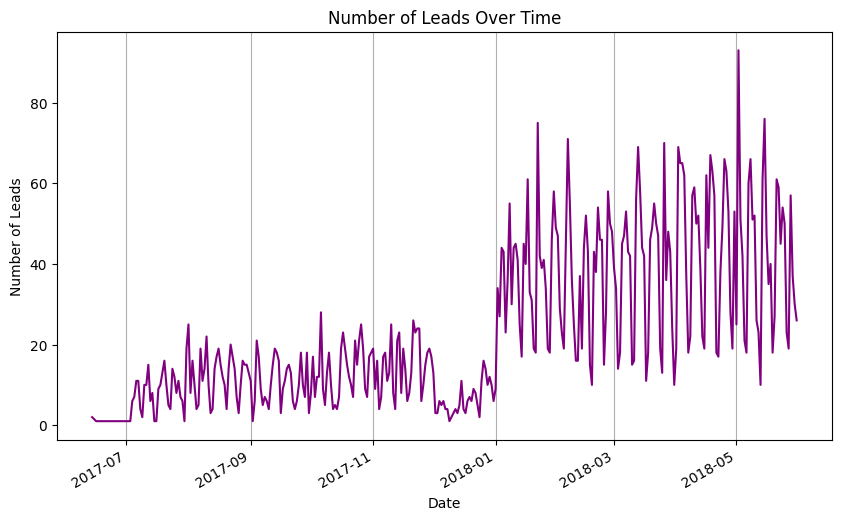

In [72]:
# Plotting the number of leads over time (first_contact_date)
plt.figure(figsize=(10, 6))
marketing_df['first_contact_date'].value_counts().sort_index().plot(kind='line', color='purple')
plt.title('Number of Leads Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Leads')
plt.grid(True, axis='x')
plt.show()

Distribution of Lead Origins: The bar chart shows that the majority of leads originate from organic search, followed by paid search and social. Smaller contributions come from direct traffic, email, and referral.

Number of Leads Over Time: The line chart illustrates the number of leads per day. There are noticeable spikes in lead activity during certain periods, with a general upward trend as we approach mid-2018.

Landing page performance

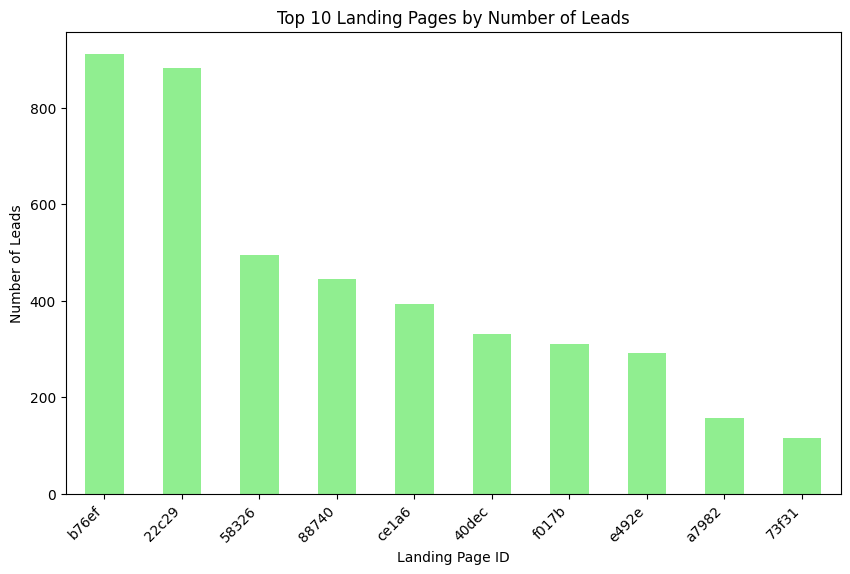

In [73]:
# 1. Top landing pages by number of leads
top_landing_pages = marketing_df['landing_page_id'].value_counts().head(10)

# 2. Performance of top landing pages over time
# Focusing on top 5 landing pages for a clearer time-based analysis
top_5_landing_pages = top_landing_pages.index[:5]
df_top_5 = marketing_df[marketing_df['landing_page_id'].isin(top_5_landing_pages)]

# Grouping by date and landing page to analyze performance over time
landing_page_performance_over_time = df_top_5.groupby([df_top_5['first_contact_date'].dt.date, 'landing_page_id']).size().unstack(fill_value=0)

# Plotting the top landing pages and performance over time
plt.figure(figsize=(10, 6))
top_landing_pages.plot(kind='bar', color='lightgreen')
plt.title('Top 10 Landing Pages by Number of Leads')
plt.xlabel('Landing Page ID')
plt.ylabel('Number of Leads')
plt.xticks(rotation=45, ha='right')
plt.show()


In [74]:
top_5_landing_pages

landing_page_title = ['lp1', 'lp2', 'lp3', 'lp4', 'lp5']

<Figure size 1000x600 with 0 Axes>

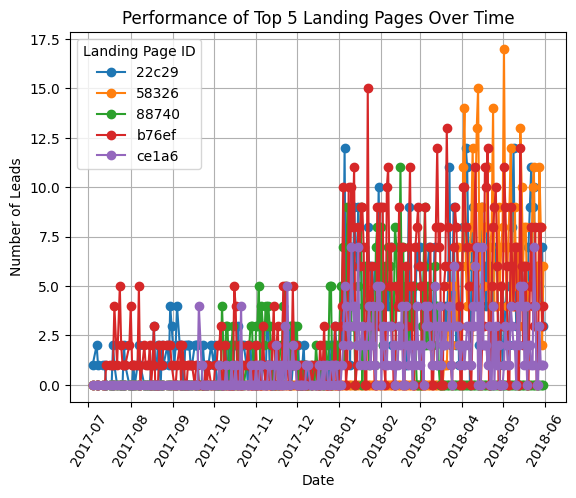

In [83]:
plt.figure(figsize=(10, 6))
landing_page_performance_over_time.plot(kind='line', marker='o')
plt.title('Performance of Top 5 Landing Pages Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Leads')
plt.xticks(rotation=60)
plt.legend(title='Landing Page ID')
plt.grid(True)
plt.show()

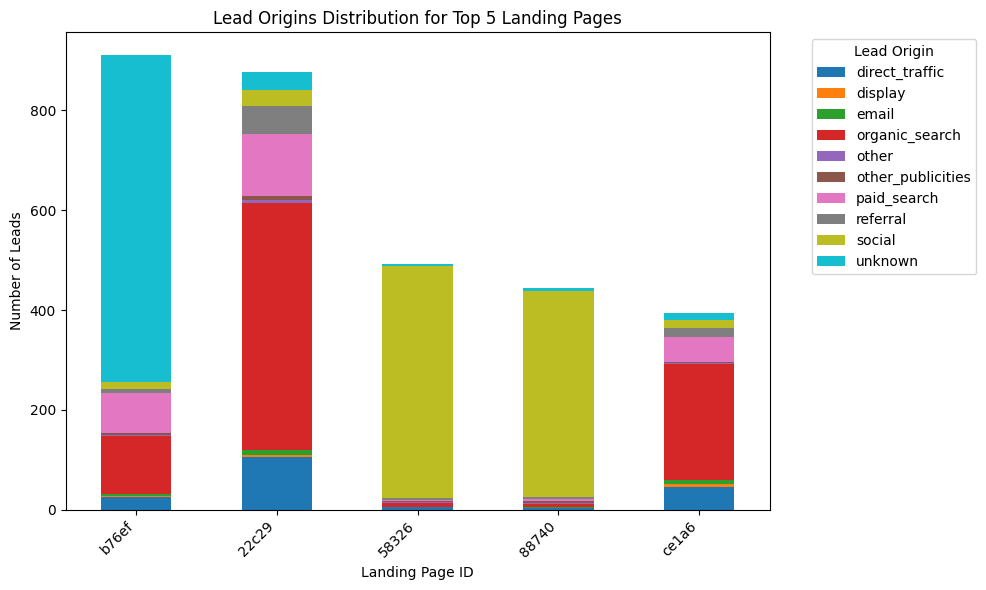

In [77]:
# Analyze the relationship between lead origins and landing pages
# Grouping by landing_page_id and origin to count the number of leads from each origin for each landing page
origin_per_landing_page = marketing_df.groupby(['landing_page_id', 'origin']).size().unstack(fill_value=0)

# Plotting the distribution for the top 5 landing pages (as before) for better visualization
origin_per_landing_page_top5 = origin_per_landing_page.loc[top_5_landing_pages]

# Plot a stacked bar chart to visualize the origins per landing page
origin_per_landing_page_top5.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Lead Origins Distribution for Top 5 Landing Pages')
plt.xlabel('Landing Page ID')
plt.ylabel('Number of Leads')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Lead Origin', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

/tmp/ipykernel_307115/3975086287.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Lead Origin', bbox_to_anchor=(1.05, 1), loc='upper left')


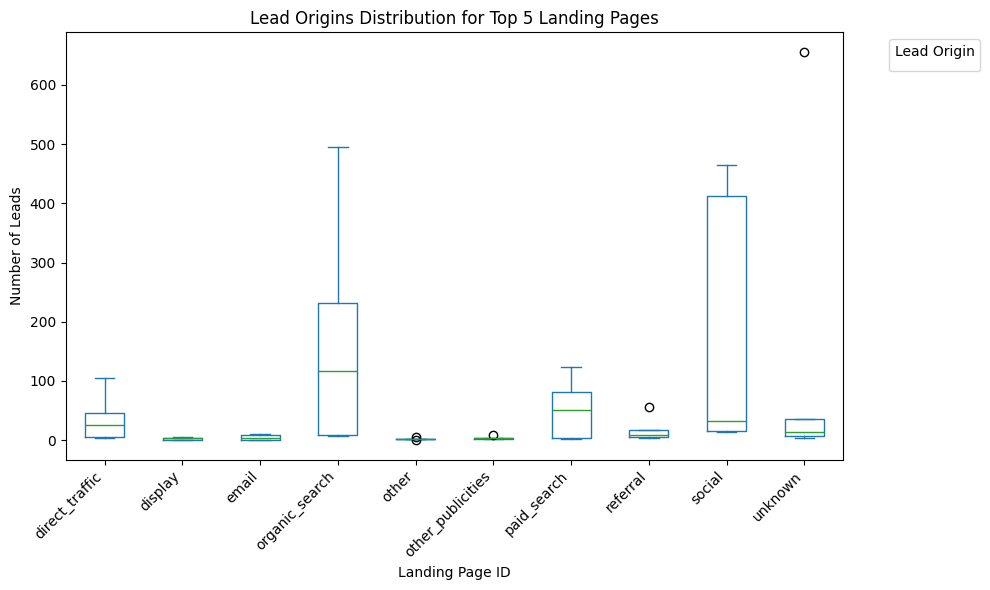

In [87]:
# Plot a stacked bar chart to visualize the origins per landing page
origin_per_landing_page_top5.plot(kind='box', figsize=(10, 6))
plt.title('Lead Origins Distribution for Top 5 Landing Pages')
plt.xlabel('Landing Page ID')
plt.ylabel('Number of Leads')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Lead Origin', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

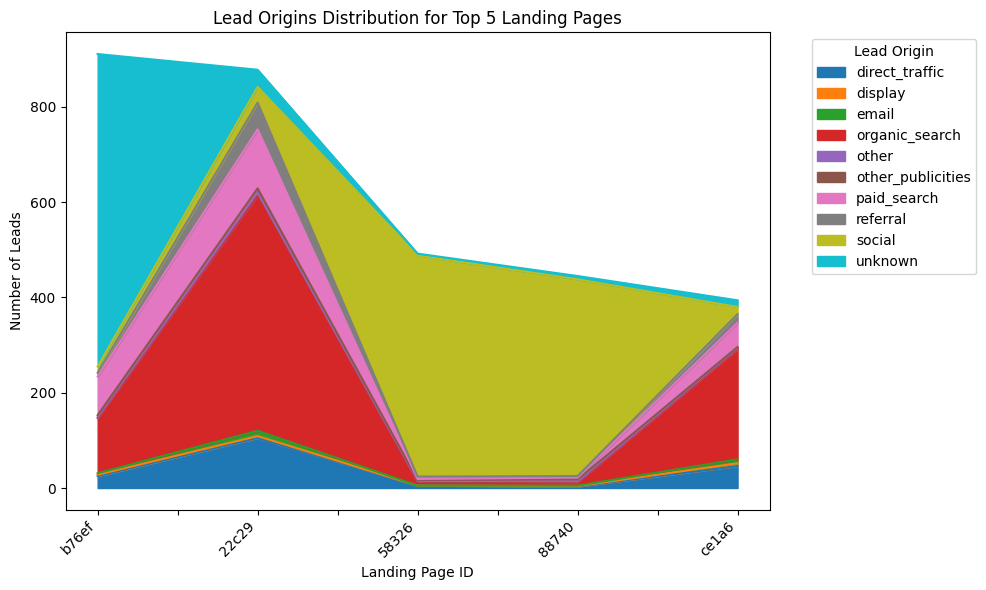

In [90]:
# Plot a stacked bar chart to visualize the origins per landing page
origin_per_landing_page_top5.plot(kind='area', figsize=(10, 6))
plt.title('Lead Origins Distribution for Top 5 Landing Pages')
plt.xlabel('Landing Page ID')
plt.ylabel('Number of Leads')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Lead Origin', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()